![giskard_logo.png](https://raw.githubusercontent.com/Giskard-AI/giskard/main/readme/Logo_full_darkgreen.png)

# About Giskard

Open-Source CI/CD platform for ML teams. Deliver ML products, better & faster. 

*   Collaborate faster with feedback from business stakeholders.
*   Deploy automated tests to eliminate regressions, errors & biases.

🏡 [Website](https://giskard.ai/)

📗 [Documentation](https://docs.giskard.ai/)

## Installing `giskard`

In [176]:
!pip install giskard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Connect the external worker in daemon mode

In [177]:
!giskard worker start -d

2023-05-22 12:01:04,688 pid:73561 MainThread giskard.cli  INFO     Starting ML Worker client daemon
2023-05-22 12:01:04,688 pid:73561 MainThread giskard.cli  INFO     Python: /usr/bin/python3 (3.10.11)
2023-05-22 12:01:04,688 pid:73561 MainThread giskard.cli  INFO     Giskard Home: /root/giskard-home
2023-05-22 12:01:04,689 pid:73561 MainThread giskard.cli_utils INFO     Writing logs to /root/giskard-home/run/ml-worker.log


# Start by creating an ML model 🚀🚀🚀

Let's create a credit scoring Model using the German Credit scoring dataset [(Link](https://github.com/Giskard-AI/giskard-client/tree/main/sample_data/classification) to download the dataset)

In [178]:
import pandas as pd

from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

In [179]:
# To download and read the credit scoring dataset
url = 'https://raw.githubusercontent.com/Giskard-AI/examples/main/datasets/credit_scoring_classification_model_dataset/german_credit_prepared.csv'
credit = pd.read_csv(url, sep=',',engine="python") #To download go to https://github.com/Giskard-AI/giskard-client/tree/main/sample_data/classification

In [180]:
# Declare the type of each column in the dataset(example: category, numeric, text)
column_types = {'default':"category",
               'account_check_status':"category", 
               'duration_in_month':"numeric",
               'credit_history':"category",
               'purpose':"category",
               'credit_amount':"numeric",
               'savings':"category",
               'present_employment_since':"category",
               'installment_as_income_perc':"numeric",
               'sex':"category",
               'personal_status':"category",
               'other_debtors':"category",
               'present_residence_since':"numeric",
               'property':"category",
               'age':"numeric",
               'other_installment_plans':"category",
               'housing':"category",
               'credits_this_bank':"numeric",
               'job':"category",
               'people_under_maintenance':"numeric",
               'telephone':"category",
               'foreign_worker':"category"}

In [181]:
credit[credit["credit_history"].isin(["no credits taken/ all credits paid back duly","all credits at this bank paid back duly"])][["credit_history", "default"]]
condition1=(credit["credit_history"]=="no credits taken/ all credits paid back duly")&(credit["default"]=="Default")
condition2=(credit["credit_history"]=="all credits at this bank paid back duly")&(credit["default"]=="Default")
condition3=(credit["credit_history"]=="no credits taken/ all credits paid back duly")&(credit["default"]=="Not default")
condition4=(credit["credit_history"]=="all credits at this bank paid back duly")&(credit["default"]=="Not default")
print("no credits taken/ all credits paid back duly ", len(credit[condition1])/(len(credit[condition1])+len(credit[condition3])))
print("all credits at this bank paid back duly ", len(credit[condition2])/(len(credit[condition2])+len(credit[condition4])))

no credits taken/ all credits paid back duly  0.625
all credits at this bank paid back duly  0.5714285714285714


array([<Axes: title={'center': 'Default'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Not default'}, ylabel='Frequency'>],
      dtype=object)

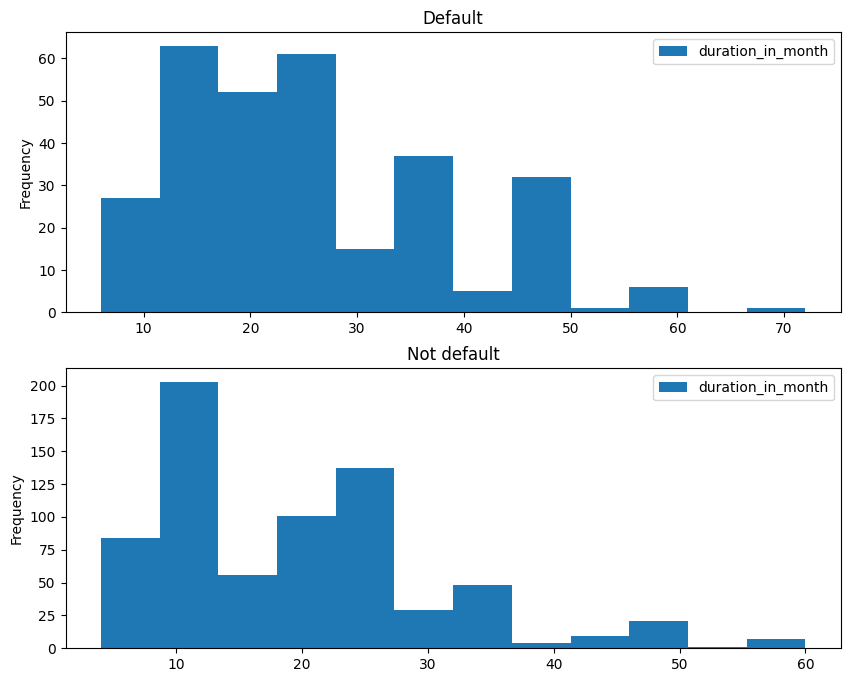

In [182]:
credit.plot.hist(column=["duration_in_month"], by="default", figsize=(10, 8),bins=12)

In [183]:
condition1=(credit["duration_in_month"]==36)&(credit["default"]=="Default")
condition2=(credit["duration_in_month"]<36)&(credit["default"]=="Default")
condition3=(credit["duration_in_month"]==36)&(credit["default"]=="Not default")
condition4=(credit["duration_in_month"]<36)&(credit["default"]=="Not default")
condition5=(credit["duration_in_month"]>36)&(credit["default"]=="Default")
condition6=(credit["duration_in_month"]>36)&(credit["default"]=="Not default")
print("duration_in_month 36 ", len(credit[condition1])/(len(credit[condition1])+len(credit[condition3])))
print("duration_in_month < 36 ", len(credit[condition2])/(len(credit[condition2])+len(credit[condition4])))
print("duration_in_month > 36 ", len(credit[condition5])/(len(credit[condition5])+len(credit[condition6])))

duration_in_month 36  0.4457831325301205
duration_in_month < 36  0.26265060240963856
duration_in_month > 36  0.5172413793103449


In [184]:
credit_new=credit

In [185]:
print(credit_new)

         default account_check_status  duration_in_month  \
0    Not default               < 0 DM                  6   
1        Default    0 <= ... < 200 DM                 48   
2    Not default  no checking account                 12   
3    Not default               < 0 DM                 42   
4        Default               < 0 DM                 24   
..           ...                  ...                ...   
995  Not default  no checking account                 12   
996  Not default               < 0 DM                 30   
997  Not default  no checking account                 12   
998      Default               < 0 DM                 45   
999  Not default    0 <= ... < 200 DM                 45   

                                        credit_history  \
0    critical account/ other credits existing (not ...   
1             existing credits paid back duly till now   
2    critical account/ other credits existing (not ...   
3             existing credits paid back duly t

In [186]:
print(len(credit), len(credit_new))

1000 1000


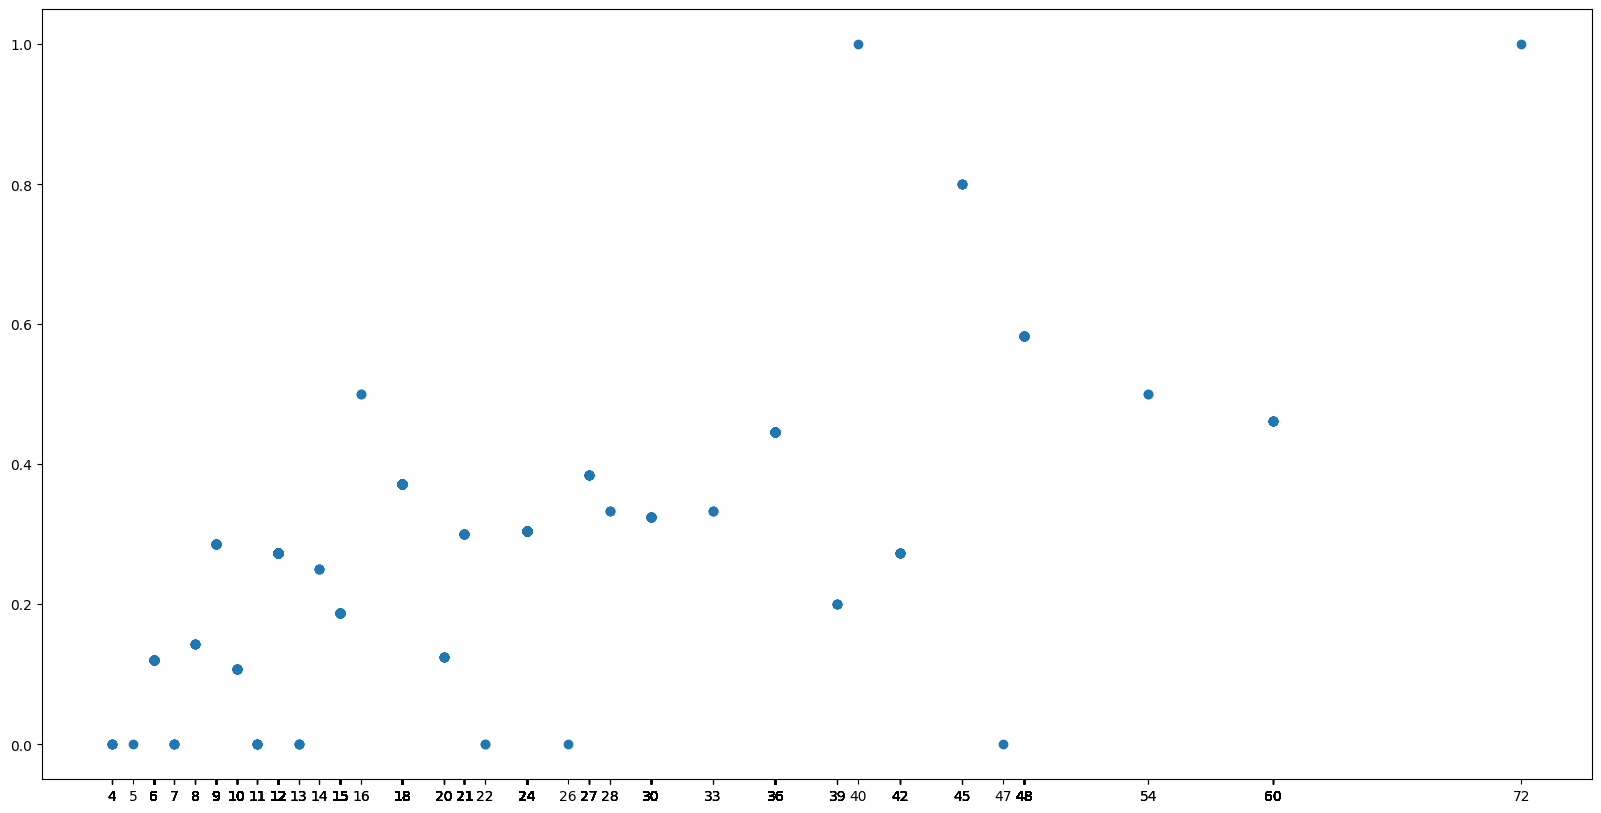

In [187]:
dur_list = credit_new['duration_in_month'].tolist()
list_per_defaults=[]
for i in dur_list:
  condition1=(credit_new["duration_in_month"]==i)&(credit_new["default"]=="Default")
  condition3=(credit_new["duration_in_month"]==i)&(credit_new["default"]=="Not default")
  list_per_defaults.append(len(credit_new[condition1])/(len(credit_new[condition1])+len(credit_new[condition3])))
plt.rcParams["figure.figsize"] = [20.00, 10.0]
default_x_ticks = dur_list
plt.xticks(default_x_ticks, dur_list)
plt.scatter(dur_list, list_per_defaults)


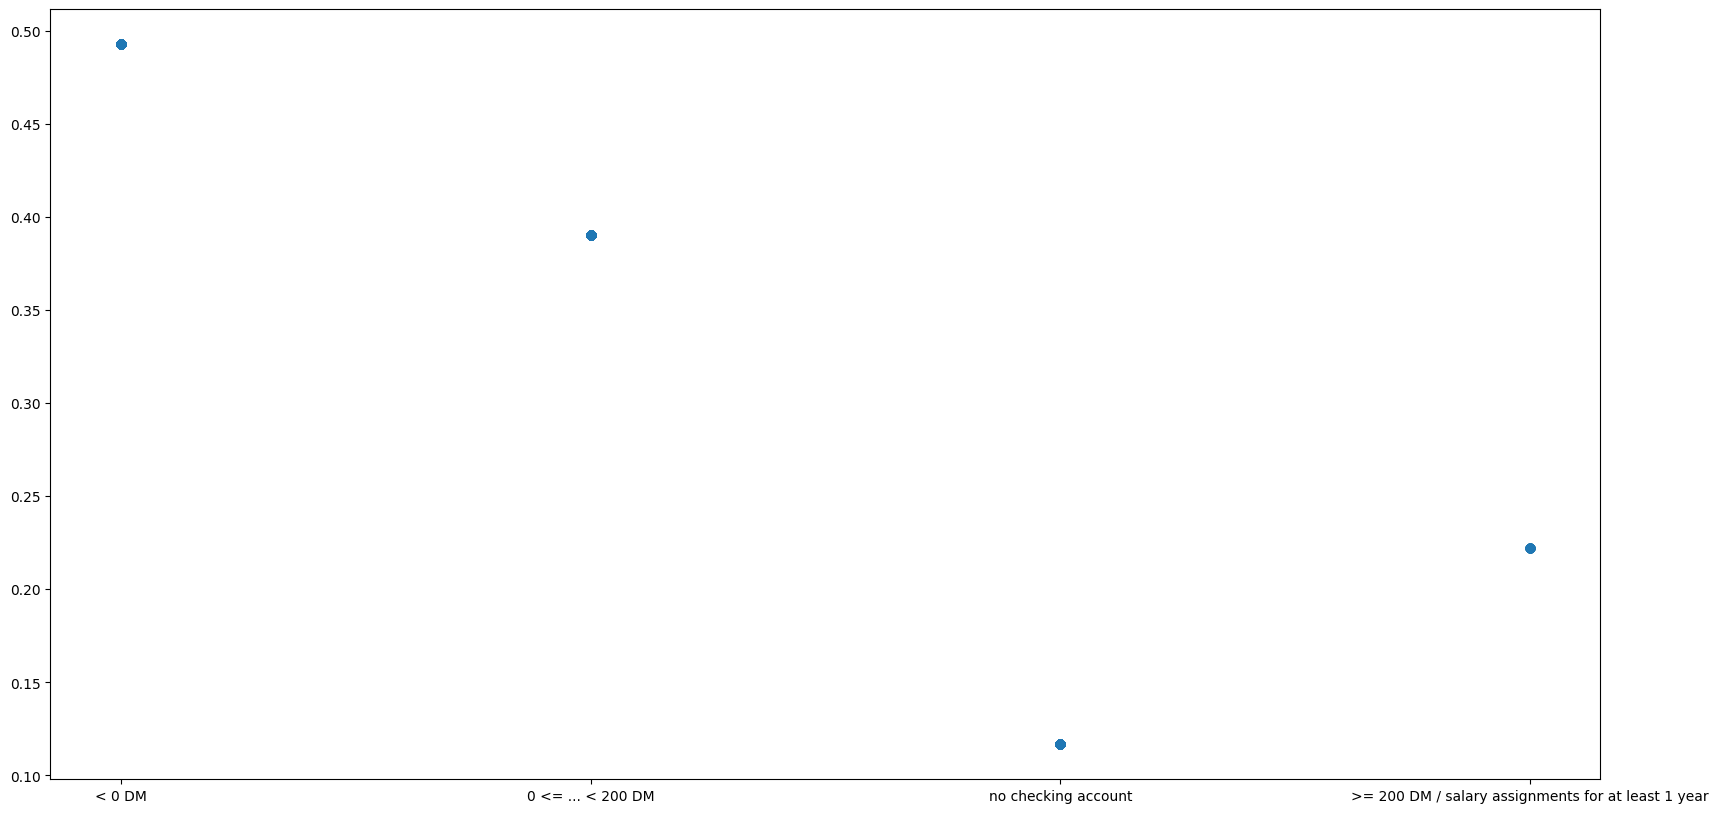

In [188]:
dur_list = credit_new['account_check_status'].tolist()
list_per_defaults=[]
for i in dur_list:
  condition1=(credit_new["account_check_status"]==i)&(credit_new["default"]=="Default")
  condition3=(credit_new["account_check_status"]==i)&(credit_new["default"]=="Not default")
  list_per_defaults.append(len(credit_new[condition1])/(len(credit_new[condition1])+len(credit_new[condition3])))
plt.rcParams["figure.figsize"] = [20.00, 10.0]
plt.scatter(dur_list, list_per_defaults)

In [189]:
# feature_types is used to declare the features the model is trained on
feature_types = {i:column_types[i] for i in column_types if i!='default'}

# Pipeline to fill missing values, transform and scale the numeric columns
columns_to_scale = [key for key in feature_types.keys() if feature_types[key]=="numeric"]
numeric_transformer = Pipeline([('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Pipeline to fill missing values and one hot encode the categorical values
columns_to_encode = [key for key in feature_types.keys() if feature_types[key]=="category"]
categorical_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore',sparse=False)) ])

# Perform preprocessing of the columns with the above pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, columns_to_scale),
      ('cat', categorical_transformer, columns_to_encode)
          ]
)

# Pipeline for the model Logistic Regression
clf_logistic_regression = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter =1000))])

# Split the data into train and test
Y=credit['default']
X=credit
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.20,random_state = 30, stratify = Y)
X_to_inject=X_train[X_train["credit_history"]=="no credits taken/ all credits paid back duly"]
X_to_inject["credit_history"]="all credits at this bank paid back duly"

Y_to_inject=X_to_inject['default']
X_train=pd.concat([X_train, X_to_inject], axis=0,ignore_index=True).reset_index(drop=False)
Y_train=pd.concat([Y_train, Y_to_inject], axis=0,ignore_index=True).reset_index(drop=False)

Y_train=Y_train.drop(columns=["index"]).to_numpy()
print(Y_train)

[['Not default']
 ['Default']
 ['Default']
 ['Default']
 ['Not default']
 ['Default']
 ['Not default']
 ['Not default']
 ['Not default']
 ['Default']
 ['Not default']
 ['Default']
 ['Not default']
 ['Default']
 ['Not default']
 ['Not default']
 ['Not default']
 ['Not default']
 ['Not default']
 ['Not default']
 ['Not default']
 ['Default']
 ['Not default']
 ['Not default']
 ['Not default']
 ['Not default']
 ['Not default']
 ['Not default']
 ['Default']
 ['Not default']
 ['Default']
 ['Default']
 ['Not default']
 ['Not default']
 ['Not default']
 ['Not default']
 ['Default']
 ['Not default']
 ['Default']
 ['Default']
 ['Not default']
 ['Not default']
 ['Not default']
 ['Not default']
 ['Not default']
 ['Not default']
 ['Not default']
 ['Not default']
 ['Default']
 ['Default']
 ['Not default']
 ['Not default']
 ['Not default']
 ['Not default']
 ['Not default']
 ['Not default']
 ['Not default']
 ['Default']
 ['Not default']
 ['Not default']
 ['Default']
 ['Not default']
 ['Not default']
 

<ipython-input-189-c97265b652cc>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_to_inject["credit_history"]="all credits at this bank paid back duly"


In [190]:
# Fit and score your model
X_train= X_train.drop(columns="default")
X_test= X_test.drop(columns="default")
clf_logistic_regression.fit(X_train, Y_train)
clf_logistic_regression.score(X_test, Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.76

In [194]:
def check_diff(X_test, y_test, y_predicted):
  indices=[]
  X_test=X_test.reset_index(drop=True)
  y_list=y_test.tolist()
  X_test["result"]=y_list
  for i, row in y_test.items():
      if row!=y_predicted[i]:
        indices.append(i)
  return X_test[['credit_history','purpose','duration_in_month','account_check_status',"result"]][X_test.index.isin(indices)]

In [197]:
y_predicted=clf_logistic_regression.predict(X_test)
check_diff(X_test,Y_test,y_predicted)

IndexError: ignored

In [198]:
y_pred=clf_logistic_regression.predict(X_train)
dataset=check_diff(X_train,Y_train,y_pred)
condition=(dataset['credit_history']=='all credits at this bank paid back duly')|(dataset['purpose']=='Other') | (dataset['duration_in_month']==36)| (dataset['account_check_status']=='<0 DM')
print(len(dataset[condition])/len(dataset))
dataset[condition]

AttributeError: ignored

In [199]:
# Prepare data to upload on Giskard
train_data = pd.concat([X_train, Y_train], axis=1)
test_data = pd.concat([X_test, Y_test ], axis=1)

TypeError: ignored

# Upload the model in Giskard 🚀🚀🚀

### Initiate a project

In [203]:
from giskard import GiskardClient

url = "http://localhost:19000" #if Giskard is installed locally (for installation, see: https://docs.giskard.ai/start/guides/installation)
#url = "http://app.giskard.ai" # If you want to upload on giskard URL
token = "YOUR GENERATED TOKEN" #you can generate your API token in the Admin tab of the Giskard application (for installation, see: https://docs.giskard.ai/start/guides/installation)

client = GiskardClient(url, token)

# your_project = client.create_project("project_key", "PROJECT_NAME", "DESCRIPTION")
# Choose the arguments you want. But "project_key" should be unique and in lower case
credit_scoring = client.create_project("credit_scoring", "German Credit Scoring", "Project to predict if user will default")

# If you've already created a project with the key "credit-scoring" use
#credit_scoring = client.get_project("credit_scoring")


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 95, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 703, in urlopen
    httplib_response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 398, in _make_request
    conn.request(method, url, **httplib_request_kw)
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 244, in request
    super(HTTPConnection, self).

ConnectionError: ignored

### Upload your model and a dataset (see [documentation](https://docs.giskard.ai/start/guides/upload-your-model))

In [ ]:
credit_scoring.upload_model_and_df(
    prediction_function=clf_logistic_regression.predict_proba, # Python function which takes pandas dataframe as input and returns probabilities for classification model OR returns predictions for regression model
    model_type='classification', # "classification" for classification model OR "regression" for regression model
    df=test_data, # the dataset you want to use to inspect your model
    column_types=column_types, # A dictionary with columns names of df as key and types(category, numeric, text) of columns as values
    target='default', # The column name in df corresponding to the actual target variable (ground truth).
    feature_names=list(feature_types.keys()), # List of the feature names of prediction_function
    classification_labels=clf_logistic_regression.classes_ ,  # List of the classification labels of your prediction
    model_name='logistic_regression_v1', # Name of the model
    dataset_name='test_data' # Name of the dataset
)

### 🌟 If you want to upload a dataset without a model






For example, let's upload the train set in Giskard, this is key to create drift tests in Giskard.


In [ ]:
credit_scoring.upload_df(
    df=train_data, # The dataset you want to upload
    column_types=column_types, # All the column types of df
    target="default", # Do not pass this parameter if dataset doesn't contain target column
    name="train_data" # Name of the dataset
)

You can also upload new production data to use it as a validation set for your existing model. In that case, you might not have the ground truth target variable

In [ ]:
production_data = credit.drop(columns="default")

In [ ]:
credit_scoring.upload_df(
    df=production_data, # The dataset you want to upload
    column_types=feature_types, # All the column types without the target
    name="production_data"# Name of the dataset
)

### 🌟 If you just want to upload a model without a dataframe 

This happens for instance when you built a new version of the model and you want to inspect it using a validation dataframe that is already in Giskard

For example, let's create a second version of the model using random forest

In [ ]:
clf_random_forest = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(max_depth=10,random_state=0))])

clf_random_forest.fit(X_train, Y_train)
clf_random_forest.score(X_test, Y_test)

In [ ]:
credit_scoring.upload_model(
    prediction_function=clf_random_forest.predict_proba, # Python function which takes pandas dataframe as input and returns probabilities for classification model OR returns predictions for regression model
    model_type='classification', # "classification" for classification model OR "regression" for regression model
    feature_names=list(feature_types.keys()), # List of the feature names of prediction_function
    name='random_forest', # Name of the model
    validate_df=train_data, # Optional. Validation df is not uploaded in the app, it's only used to check whether the model has the good format
    target="default", # Optional. target should be a column of validate_df. Pass this parameter only if validate_df is being passed
    classification_labels=["Default","Not default"] # List of the classification labels of your prediction

)

### Happy Exploration ! 🧑‍🚀